In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('House_Rent.csv')
# Droping missing value
print(df1.isnull().sum())
print("Length of the Data before cleaning is", len(df1))

df2 = df1.copy()
df2.dropna(inplace=True)
print("Length of the Data after removing null values", len(df2))

# Remove text data from Rent column
df3 = df2[df2['Rent(Rs)'].str.isalnum()]
print("Number of text present in Rent column", len(df2)-len(df3))

# Change dtypes of some columns
df3['Rent(Rs)'] = df3['Rent(Rs)'].astype('int')

print("Length of the Data after cleaning is", len(df3))
print("Removed", len(df1)-len(df3), "data successfully")

BHK                0
Location         122
Size(sq.ft)        0
Deposit(Rs)        0
Rent(Rs)           0
Furnishing         0
Property Age       0
Available For      0
dtype: int64
Length of the Data before cleaning is 9930
Length of the Data after removing null values 9808
Number of text present in Rent column 216
Length of the Data after cleaning is 9592
Removed 338 data successfully


In [3]:
df3.head()

,BHK,Location,Size(sq.ft),Deposit(Rs),Rent(Rs),Furnishing,Property Age,Available For
0,2,Kadubeesanahalli,1210,150000,21000,Semi Furnished,3-5 years,Family
1,2,Sivanchetti Gardens,750,200000,22000,Semi Furnished,3-5 years,All
2,1,Aecs Layout Singasandra,500,50000,10000,Semi Furnished,Newly Constructed,Family
3,3,Bellandur,1879,250000,43000,Semi Furnished,5-10 years,All
4,3,Rr Nagar,1620,100000,20000,Semi Furnished,3-5 years,Family


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9592 entries, 0 to 9929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BHK            9592 non-null   int64 
 1   Location       9592 non-null   object
 2   Size(sq.ft)    9592 non-null   int64 
 3   Deposit(Rs)    9592 non-null   int64 
 4   Rent(Rs)       9592 non-null   int32 
 5   Furnishing     9592 non-null   object
 6   Property Age   9592 non-null   object
 7   Available For  9592 non-null   object
dtypes: int32(1), int64(3), object(4)
memory usage: 637.0+ KB


In [5]:
df3.columns

Index(['BHK', 'Location', 'Size(sq.ft)', 'Deposit(Rs)', 'Rent(Rs)',
       'Furnishing', 'Property Age', 'Available For'],
      dtype='object')

In [6]:
df3.describe()

,BHK,Size(sq.ft),Deposit(Rs),Rent(Rs)
count,9592.000000,9592.000000,9.592000e+03,9592.000000
mean,2.013449,1061.393036,1.299635e+05,19139.236864
std,0.731728,503.419492,1.254093e+05,17714.082968
min,1.000000,0.000000,1.000000e+00,10.000000
25%,2.000000,660.000000,6.000000e+04,11000.000000
50%,2.000000,1090.000000,1.000000e+05,17000.000000
75%,2.000000,1300.000000,1.500000e+05,24000.000000
max,4.000000,8000.000000,3.300000e+06,800000.000000


In [7]:
row, columns = df3.shape
print("Number of rows is", row)
print("Number of columns is", columns)

Number of rows is 9592
Number of columns is 8


In [8]:
print("Number of unique BHK",len(df3.BHK.unique()))
print("Displaying unique BHK", df3.BHK.unique())

Number of unique BHK 4
Displaying unique BHK [2 1 3 4]


In [9]:
print("Number of unique Address is", len(df3.Location.unique()))

Number of unique Address is 1338


In [10]:
location_counts = df3['Location'].value_counts()
locations_below_10 = location_counts[location_counts <= 10].index
print("There are", len(locations_below_10), "location which has less than 10 data points")

There are 1171 location which has less than 10 data points


In [11]:
location_counts = df3['Location'].value_counts()
locations_above_10 = location_counts[location_counts > 10].index
df3 = df3[df3['Location'].isin(locations_above_10)]
print("There are", len(locations_above_10), "location which has greater than 10 data points") 

There are 167 location which has greater than 10 data points


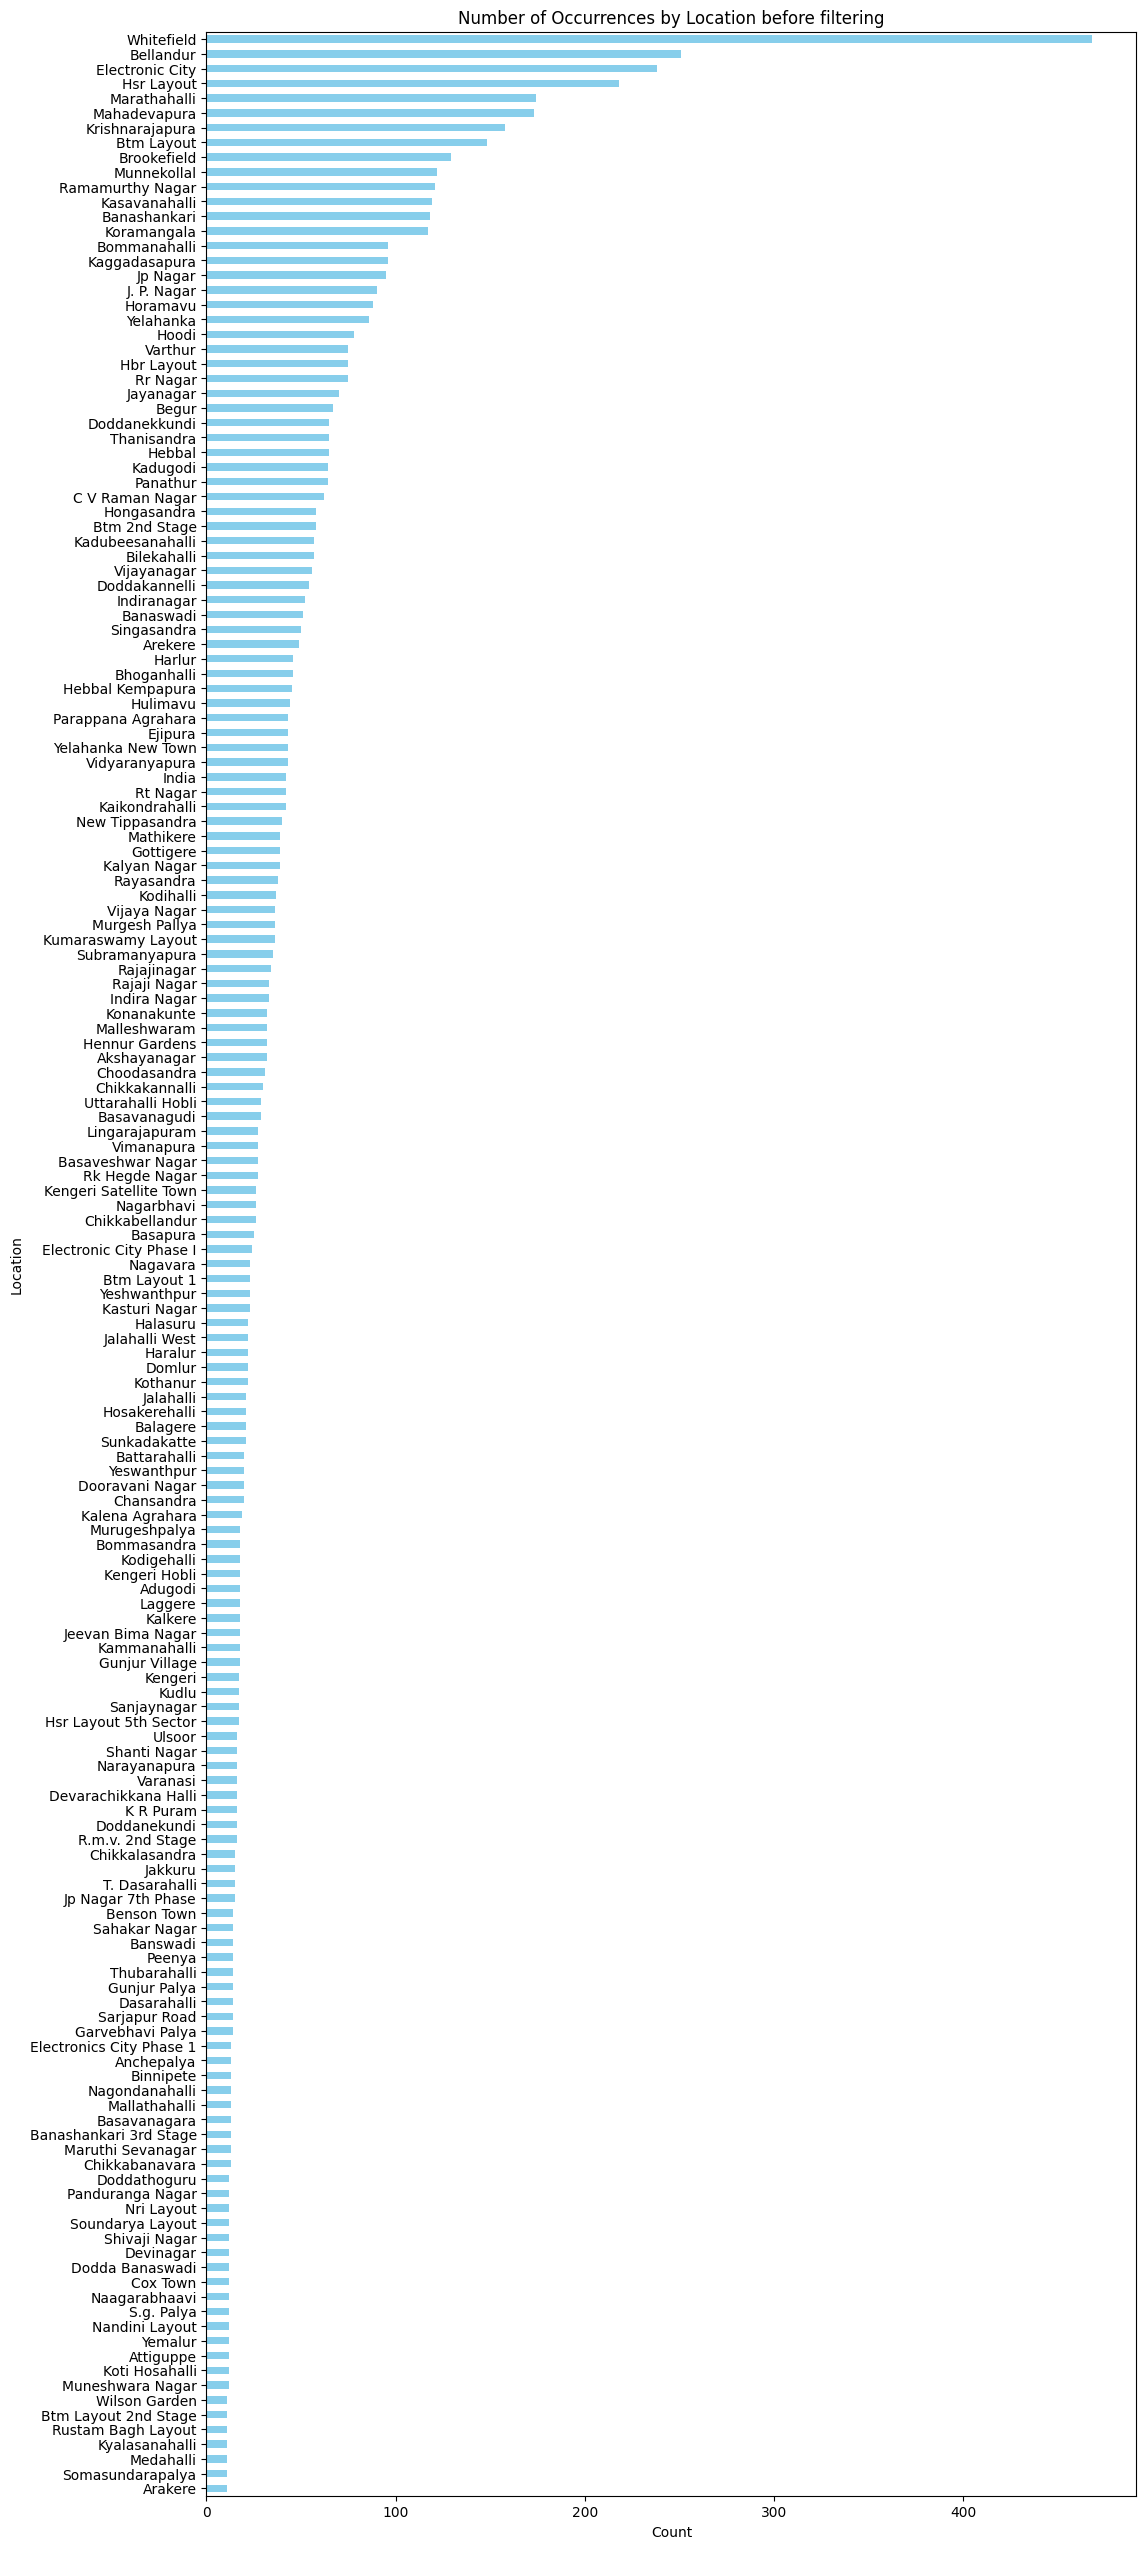

In [12]:
location_counts = df3['Location'].value_counts()
plt.figure(figsize=(12,32))
location_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Occurrences by Location before filtering')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [13]:
df3 = df3[df3['Location'] != 'India']
df3['Location'] = df3['Location'].str.replace('Indiranagar', 'Indira Nagar')  
df3['Location'] = df3['Location'].str.replace('Jp Nagar 7th Phase', 'J.P Nagar')
df3['Location'] = df3['Location'].str.replace('Jp Nagar', 'J.P Nagar')
df3['Location'] = df3['Location'].str.replace('J. P. Nagar', 'J.P Nagar')
df3['Location'] = df3['Location'].str.replace('Banswadi', 'Banaswadi')
df3['Location'] = df3['Location'].str.replace('Btm 2nd Stage', 'Btm Layout')
df3['Location'] = df3['Location'].str.replace('Btm Layout 1', 'Btm Layout')
df3['Location'] = df3['Location'].str.replace('Doddanekkundi', 'Doddanekundi')
df3['Location'] = df3['Location'].str.replace('Electronics City Phase 1', 'Electronic City Phase I')
df3['Location'] = df3['Location'].str.replace('Electronic City Phase I', 'Electronic City Phase 1')
df3['Location'] = df3['Location'].str.replace('Rajajinagar', 'Rajaji Nagar')
df3['Location'] = df3['Location'].str.replace('Harlur', 'Haralur')
df3['Location'] = df3['Location'].str.replace('Murgesh Pallya', 'Murugeshpalya')
df3['Location'] = df3['Location'].str.replace('Vijayanagar', 'Vijaya Nagar')
df3['Location'] = df3['Location'].str.replace('Yeswanthpur', 'Yeshwanthpur')
df3['Location'] = df3['Location'].str.replace('Naagarabhaavi', 'Nagarbhavi')
df3['Location'] = df3['Location'].str.replace('Rr Nagar', 'RR Nagar')
df3['Location'] = df3['Location'].str.replace('Rt Nagar', 'RT Nagar')
print("Number of Unique Address is",len(df3.Location.unique()))

Number of Unique Address is 152


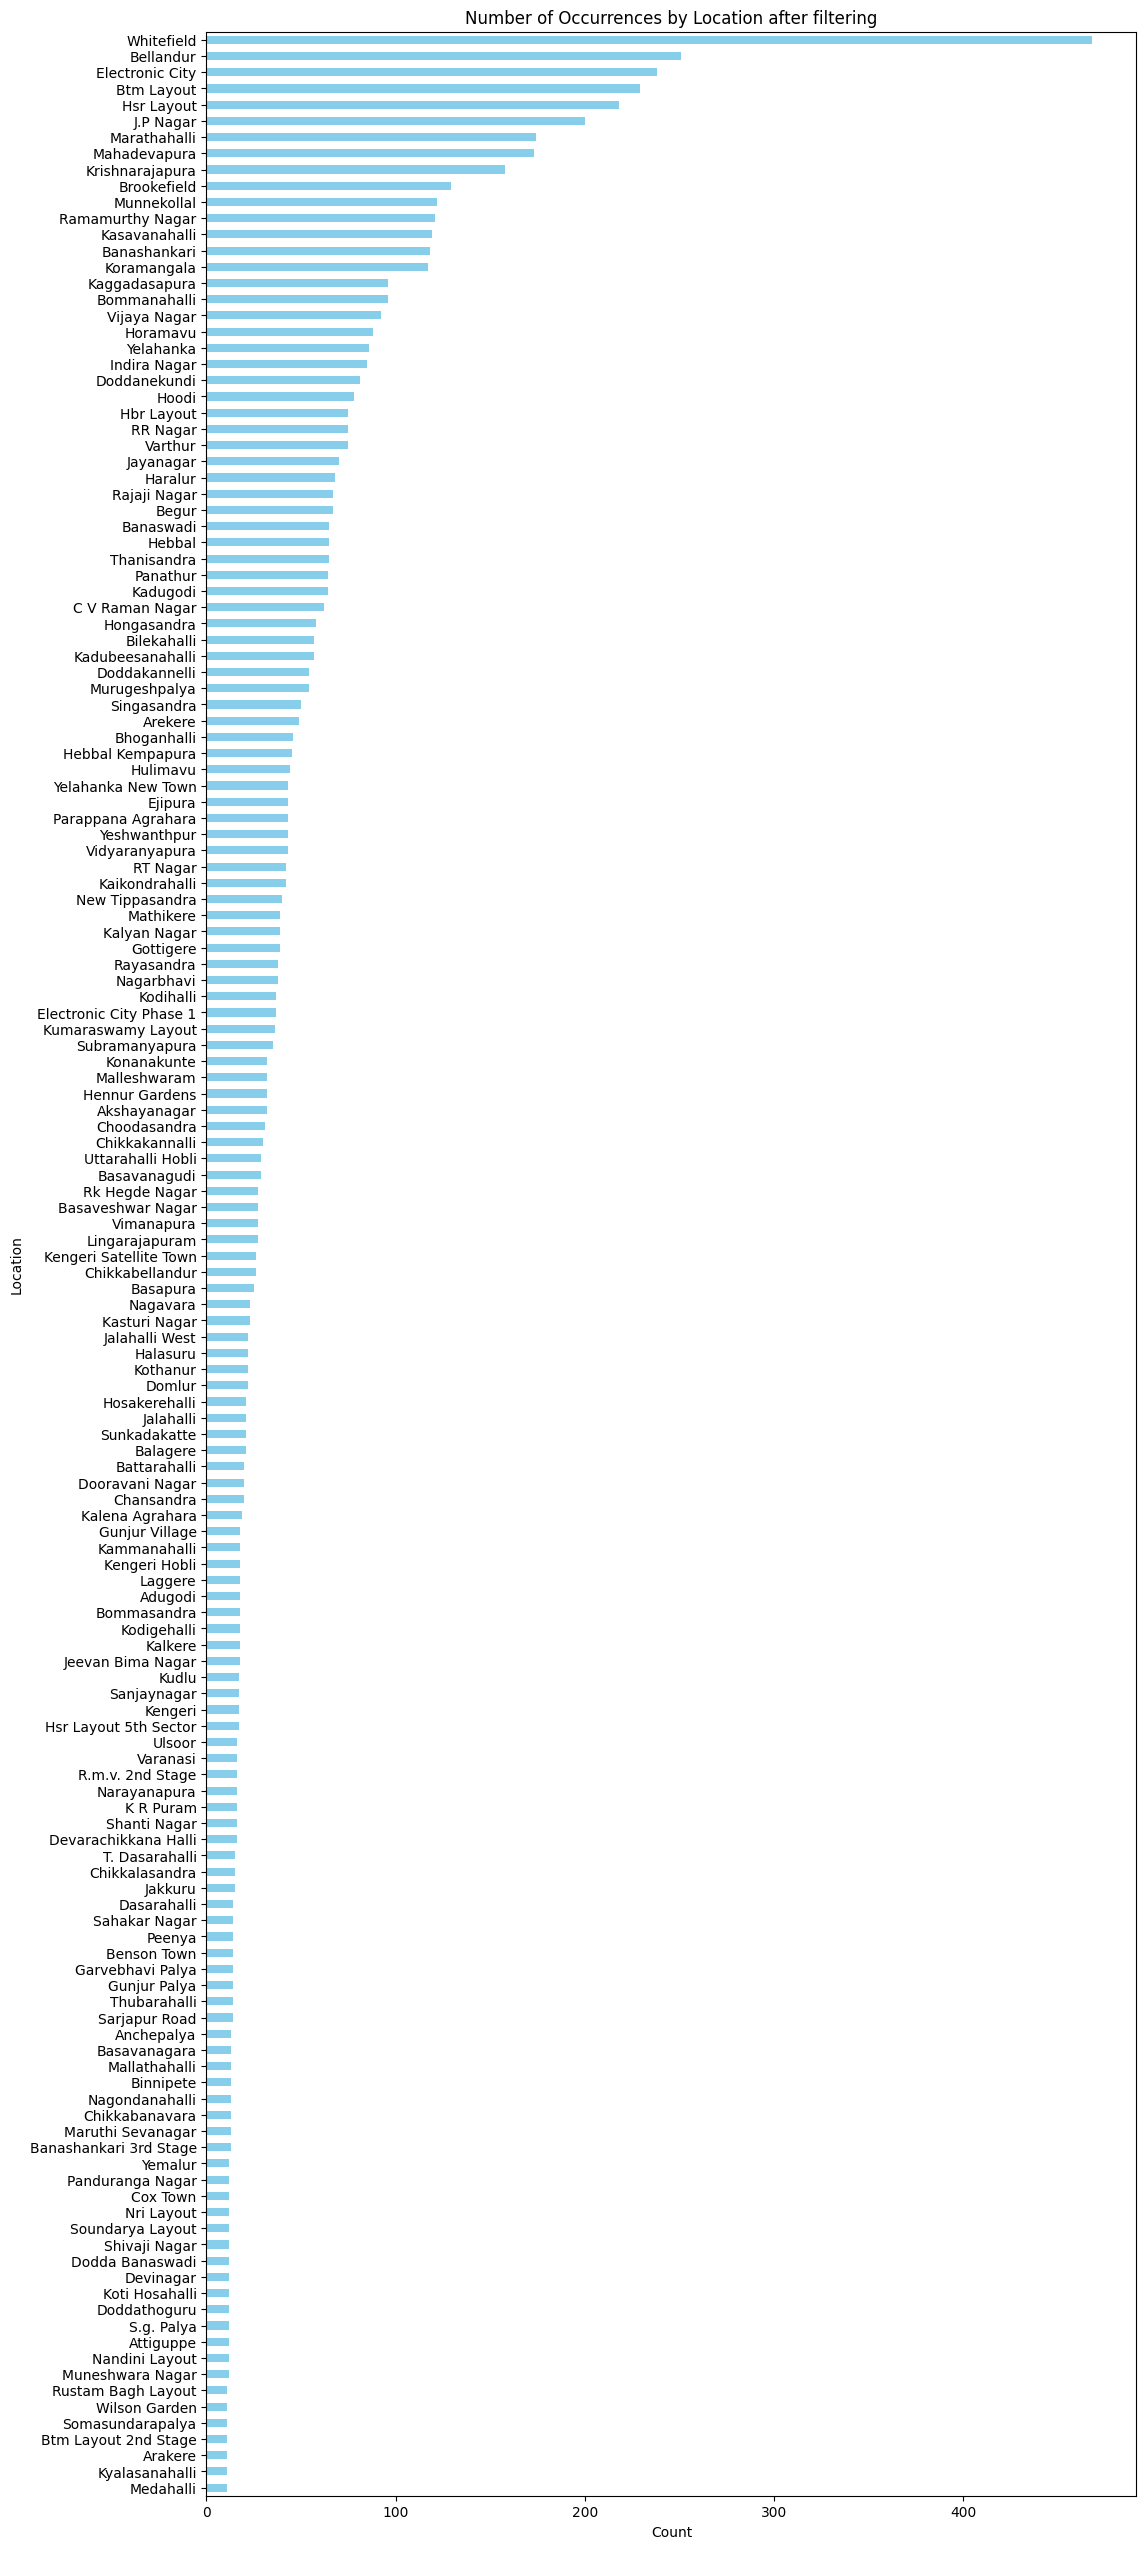

In [14]:
location_counts = df3['Location'].value_counts()
plt.figure(figsize=(12,32))
location_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Occurrences by Location after filtering')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

### Outlier Removal

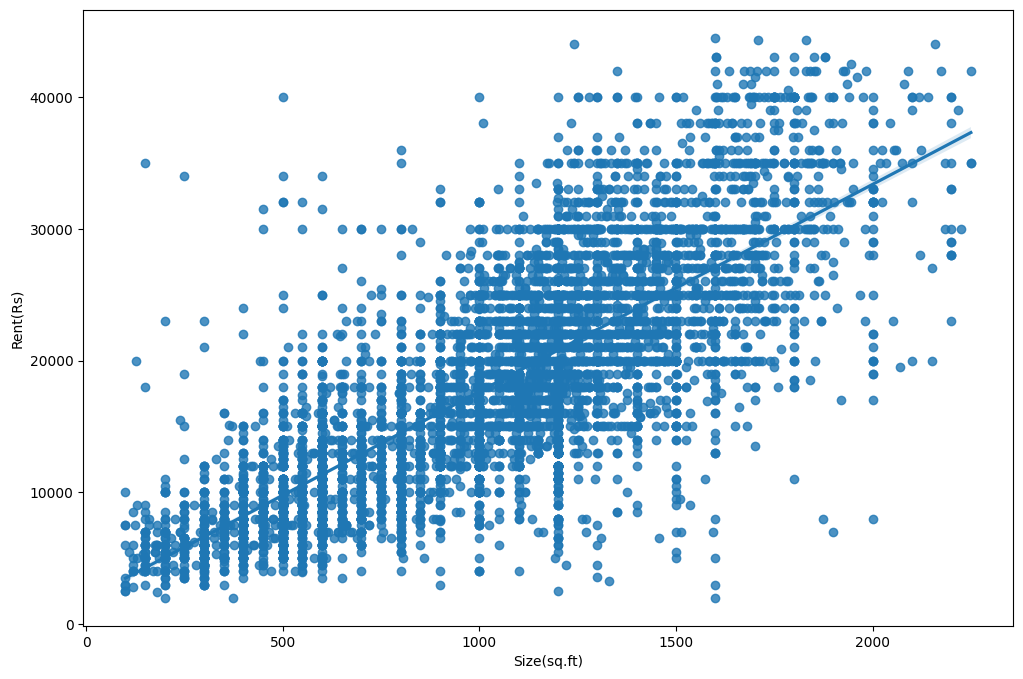

In [15]:
rent_column = 'Rent(Rs)'
size_column = 'Size(sq.ft)'

Q1_rent = df3[rent_column].quantile(0.25)
Q3_rent = df3[rent_column].quantile(0.75)
IQR_rent = Q3_rent - Q1_rent
lower_bound_rent = Q1_rent - 1.5 * IQR_rent
upper_bound_rent = Q3_rent + 1.5 * IQR_rent

Q1_size = df3[size_column].quantile(0.25)
Q3_size = df3[size_column].quantile(0.75)
IQR_size = Q3_size - Q1_size
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

df3 = df3[(df3[rent_column] >= lower_bound_rent) & (df3[rent_column] <= upper_bound_rent) & (df3[size_column] >= lower_bound_size) & (df3[size_column] <= upper_bound_size)]
df3 = df3[df3['Rent(Rs)'] >= 100]
df3 = df3[df3['Size(sq.ft)'] != 0]

plt.figure(figsize=(12,8))
sns.regplot(x=df3['Size(sq.ft)'],y=df3['Rent(Rs)'])
plt.show()

Number of outliers in 'Rent vs Furnishing': 65
Number of non-outliers in 'Rent vs Furnishing': 6872

Number of outliers in 'Rent vs BHK': 135
Number of non-outliers in 'Rent vs BHK': 6737


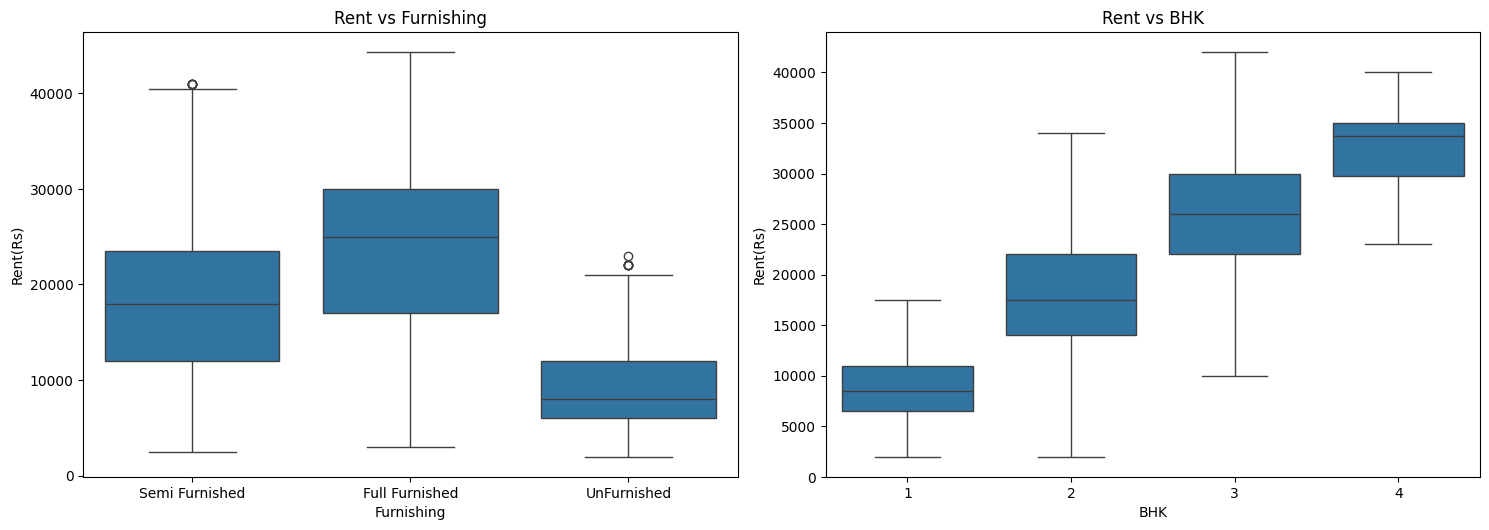

In [16]:
plt.figure(figsize=(15, 10))

outliers_furnishing = df3.groupby('Furnishing')['Rent(Rs)'].transform(lambda x: (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))) |(x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))
df_no_outliers_furnishing = df3[~outliers_furnishing]
df3 = df3[~outliers_furnishing]

num_outliers_furnishing = outliers_furnishing.sum()
num_non_outliers_furnishing = len(df_no_outliers_furnishing)
print(f"Number of outliers in 'Rent vs Furnishing': {num_outliers_furnishing}")
print(f"Number of non-outliers in 'Rent vs Furnishing': {num_non_outliers_furnishing}")
plt.subplot(2, 2, 1)
sns.boxplot(x='Furnishing', y='Rent(Rs)', data=df_no_outliers_furnishing)
plt.title('Rent vs Furnishing')

outliers_bhk = df_no_outliers_furnishing.groupby('BHK')['Rent(Rs)'].transform(lambda x: (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))) | (x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))
df_no_outliers_bhk = df_no_outliers_furnishing[~outliers_bhk]
df3 = df_no_outliers_furnishing[~outliers_bhk]

num_outliers_bhk = outliers_bhk.sum()
num_non_outliers_bhk = len(df_no_outliers_bhk)
print(f"\nNumber of outliers in 'Rent vs BHK': {num_outliers_bhk}")
print(f"Number of non-outliers in 'Rent vs BHK': {num_non_outliers_bhk}")
plt.subplot(2, 2, 2)
sns.boxplot(x='BHK', y='Rent(Rs)', data=df_no_outliers_bhk)
plt.title('Rent vs BHK')

plt.tight_layout()
plt.show()

### EDA

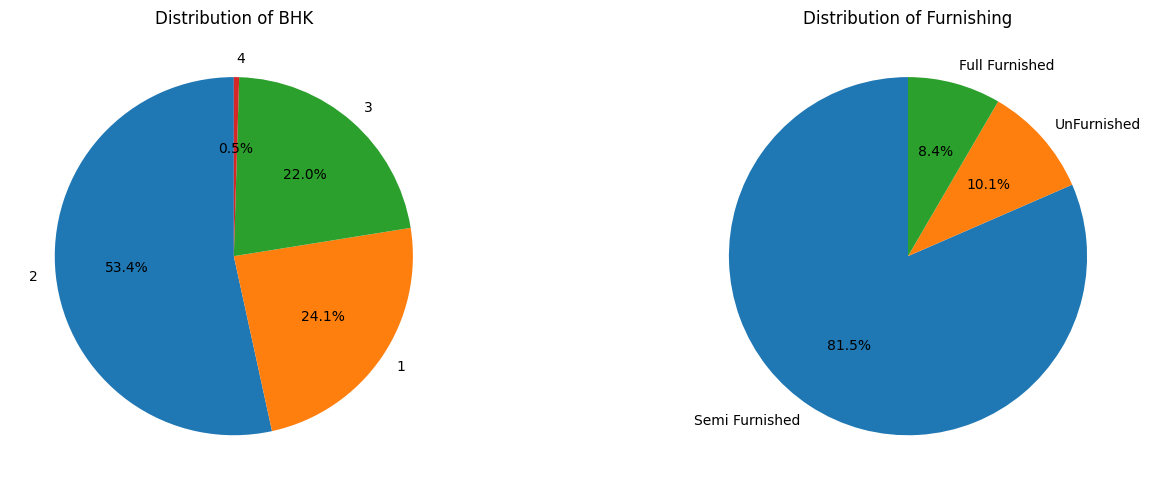

In [17]:
bhk_counts = df3['BHK'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].pie(bhk_counts, labels=bhk_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Distribution of BHK')

furnishing_counts = df3['Furnishing'].value_counts()
ax[1].pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Furnishing')

plt.tight_layout()
plt.show()

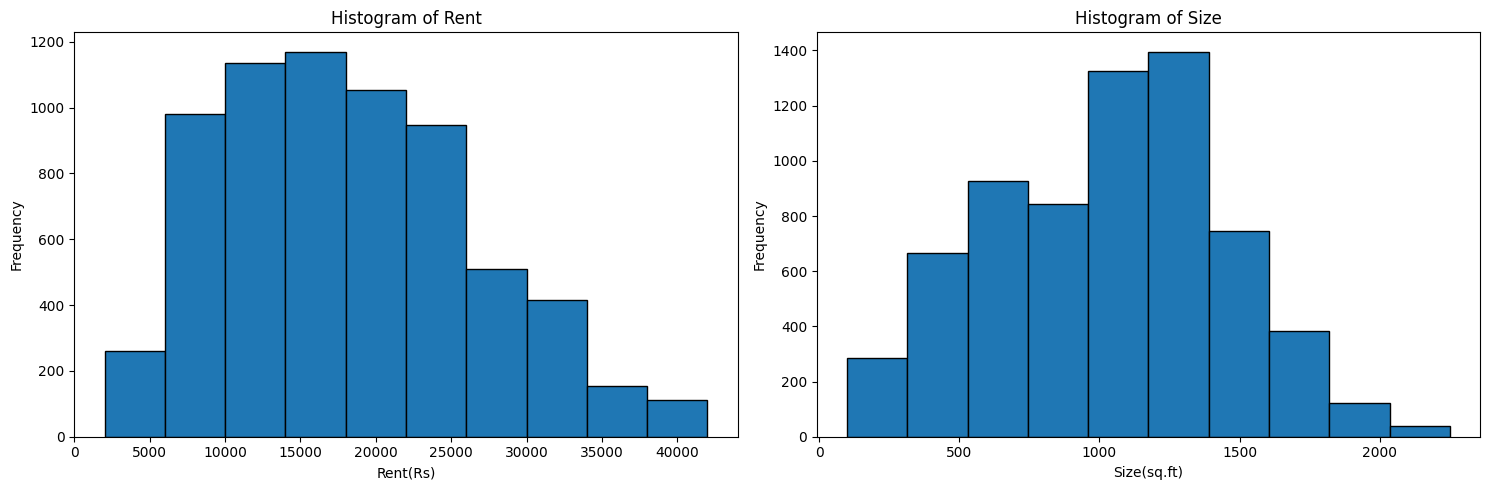

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(df3['Rent(Rs)'], bins=10, edgecolor='black')
ax[0].set_title('Histogram of Rent')
ax[0].set_xlabel('Rent(Rs)')
ax[0].set_ylabel('Frequency')
ax[1].hist(df3['Size(sq.ft)'], bins=10, edgecolor='black')
ax[1].set_title('Histogram of Size')
ax[1].set_xlabel('Size(sq.ft)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
dummies1 = pd.get_dummies(df3.Location)
dummies2 = pd.get_dummies(df3.Furnishing)
dummies = pd.concat([dummies1, dummies2], axis=1)

In [20]:
df4 = pd.concat([df3,dummies],axis='columns')
df3.columns
columns_to_drop = ['Location', 'Property Age', 'Available For', 'Furnishing']
df4= df4.drop(columns_to_drop, axis='columns')
df4.head(5)

,BHK,Size(sq.ft),Deposit(Rs),Rent(Rs),Adugodi,Akshayanagar,Anchepalya,Arakere,Arekere,Attiguppe,...,Vimanapura,Whitefield,Wilson Garden,Yelahanka,Yelahanka New Town,Yemalur,Yeshwanthpur,Full Furnished,Semi Furnished,UnFurnished
0,2,1210,150000,21000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3,1620,100000,20000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,2,1060,150000,25000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,2,1300,100000,24000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,2,1275,120000,19000,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [21]:
df4.to_csv("Data_for_Model_Building.csv", index=False)